#  Telecom Customer Churn Analysis – EDA & Predictive Modeling

###  Objective:
To explore telecom customer data, identify key factors contributing to churn, and build a predictive model to forecast churn behavior, ultimately guiding customer retention strategies.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
 

In [2]:
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv') 

## Data Preprocessing & Cleaning

In [3]:

df.head()




,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.info()




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


# Missing Values

In [5]:
df.isnull().sum()




customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [6]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_4100\1745024098.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)


## Univariate Analysis

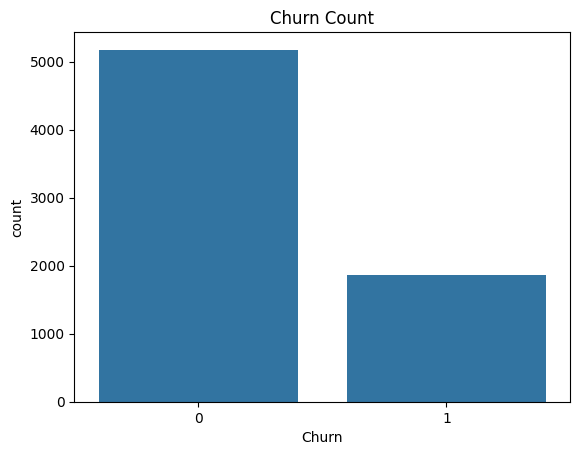

In [7]:

sns.countplot(x='Churn', data=df)
plt.title("Churn Count")
plt.show()




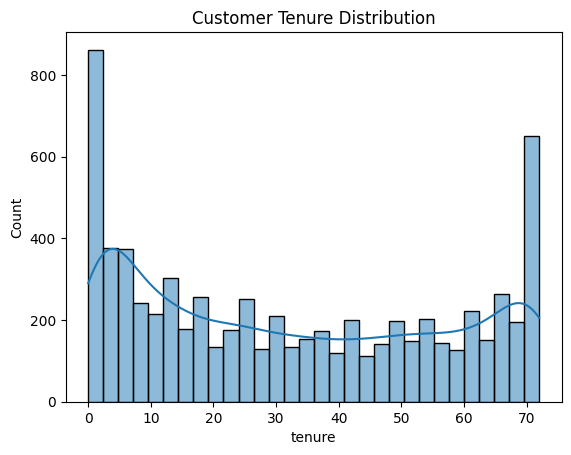

In [8]:
sns.histplot(df['tenure'], kde=True, bins=30)
plt.title("Customer Tenure Distribution")
plt.show()

##  Key Feature Analysis – Demographics, Usage & Services
### A. Demographic Insights

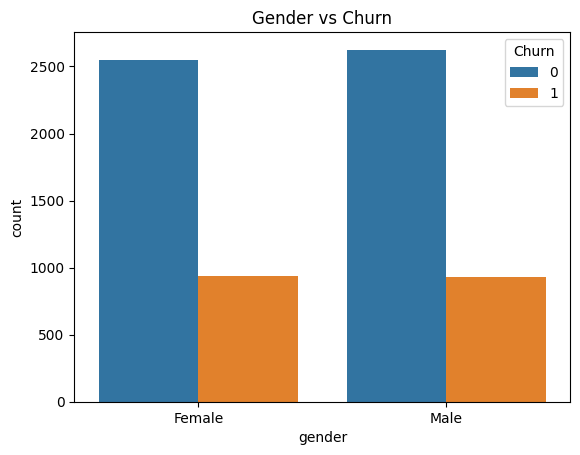

In [9]:

sns.countplot(x='gender', hue='Churn', data=df)
plt.title("Gender vs Churn")
plt.show()




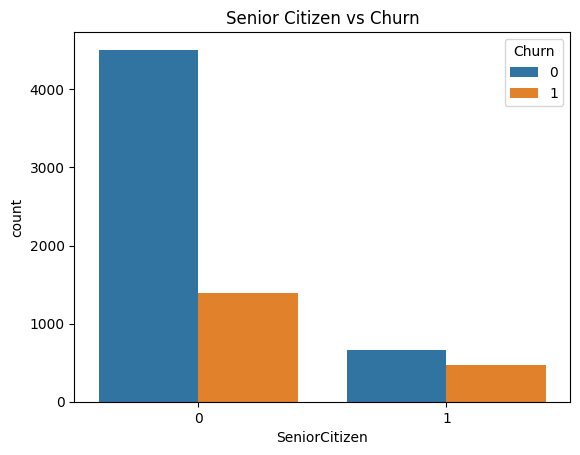

In [10]:
sns.countplot(x='SeniorCitizen', hue='Churn', data=df)
plt.title("Senior Citizen vs Churn")
plt.show()

### B. Usage Patterns

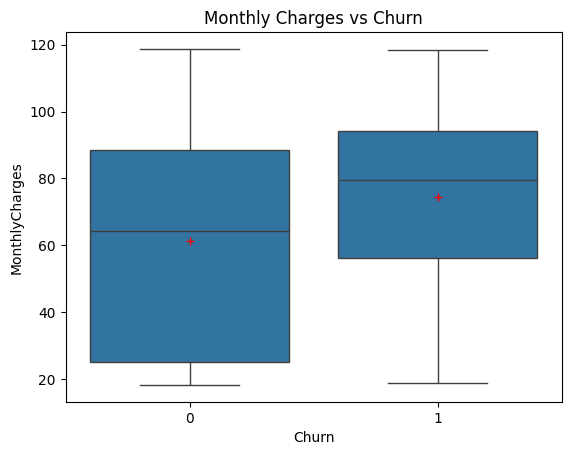

In [11]:
sns.boxplot(x='Churn',y='MonthlyCharges',data=df,showmeans=True,meanprops={"marker":"+","markeredgecolor":"red"})
plt.title("Monthly Charges vs Churn")
plt.show()




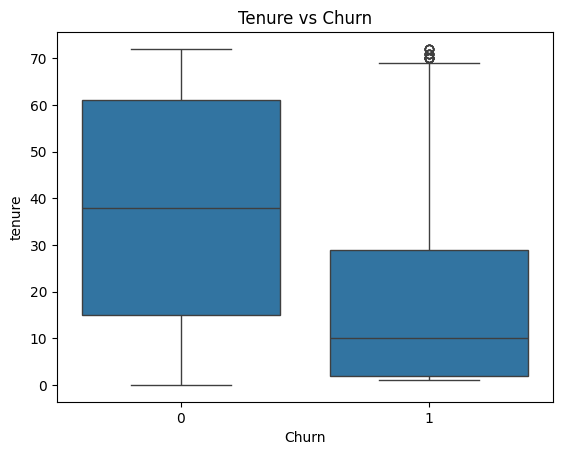

In [12]:
sns.boxplot(x='Churn', y='tenure', data=df)
plt.title("Tenure vs Churn")
plt.show()

# Monthly Charges vs Total Charges

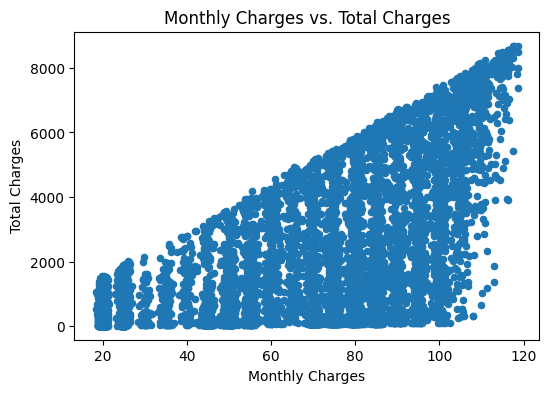

In [13]:
df[['MonthlyCharges', 'TotalCharges']].plot.scatter(x='MonthlyCharges', y='TotalCharges', figsize=(6, 4))
plt.xlabel('Monthly Charges')
plt.ylabel('Total Charges')
plt.title('Monthly Charges vs. Total Charges')
plt.show()

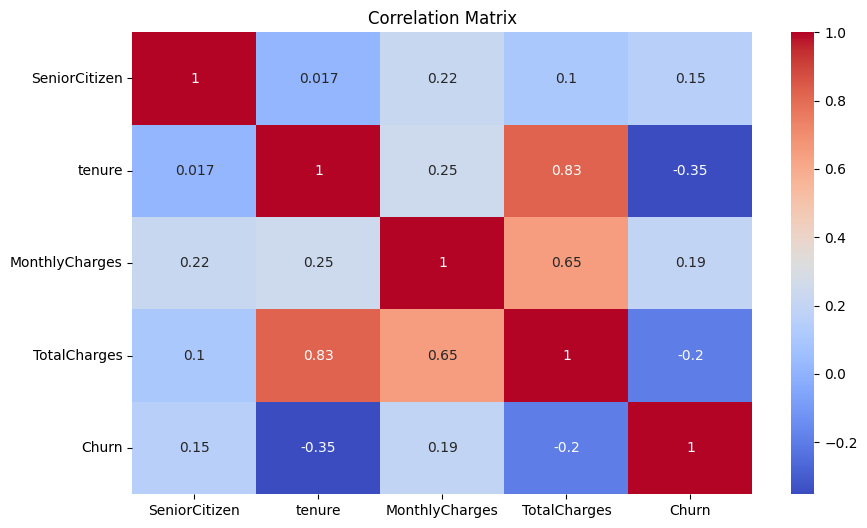

In [14]:
plt.figure(figsize=(10,6))
numerical_df = df.select_dtypes(include=['int64', 'float64'])
sns.heatmap(numerical_df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix" )
plt.show()

### C. Services Impacting Churn

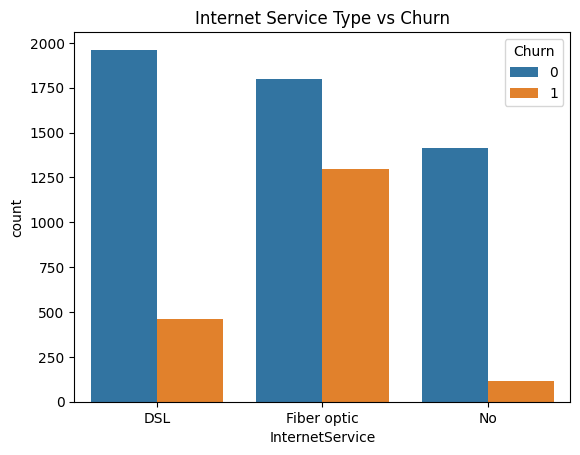

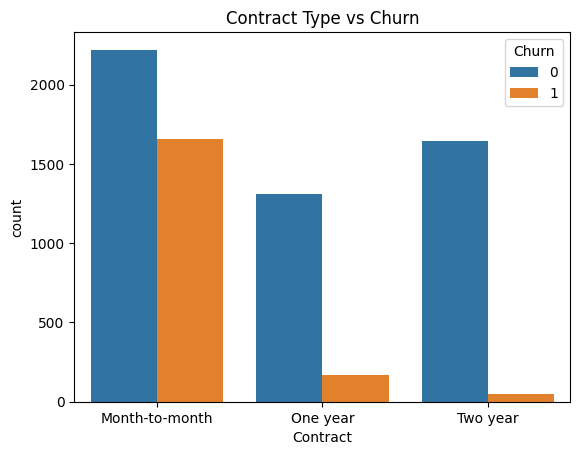

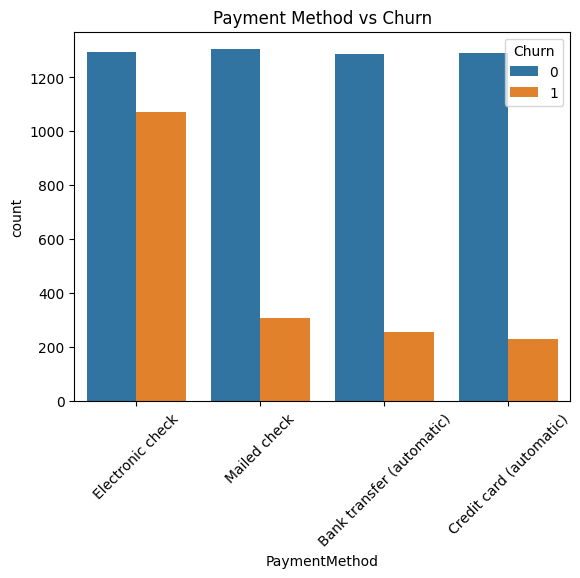

In [15]:
sns.countplot(x='InternetService', hue='Churn', data=df)
plt.title("Internet Service Type vs Churn")
plt.show()


sns.countplot(x='Contract', hue='Churn', data=df)
plt.title("Contract Type vs Churn")
plt.show()


sns.countplot(x='PaymentMethod', hue='Churn', data=df)
plt.title("Payment Method vs Churn")
plt.xticks(rotation=45)
plt.show()


# Cohort Feature: Long-Term vs Short-Term Customers

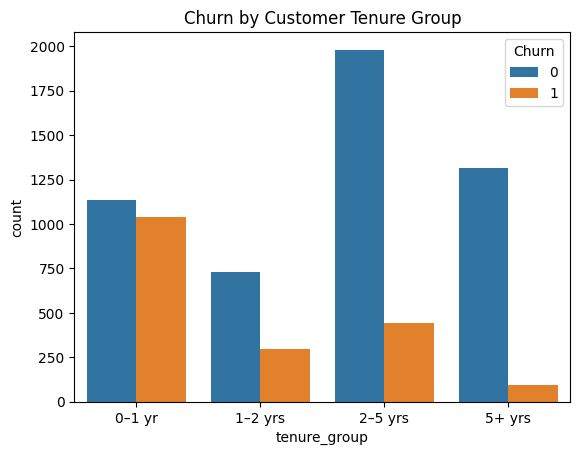

In [16]:
df['tenure_group'] = pd.cut(df['tenure'], bins=[0, 12, 24, 60, 100], labels=['0–1 yr', '1–2 yrs', '2–5 yrs', '5+ yrs'])
sns.countplot(x='tenure_group', hue='Churn', data=df)
plt.title('Churn by Customer Tenure Group')
plt.show()

In [17]:
!pip install scikit-learn


[notice] A new release of pip is available: 25.0.1 -> 25.1
[notice] To update, run: python.exe -m pip install --upgrade pip


# Feature Engineering

In [23]:
df['avg_monthly_charge'] = df['TotalCharges'] / (df['tenure'] + 1)
print(df[['tenure', 'TotalCharges', 'avg_monthly_charge']].head())



   tenure  TotalCharges  avg_monthly_charge
0       1         29.85           14.925000
1      34       1889.50           53.985714
2       2        108.15           36.050000
3      45       1840.75           40.016304
4       2        151.65           50.550000


## Key Insights Identified
- Customers with short tenure, high monthly charges, and month-to-month contracts are more likely to churn.
- Senior citizens and customers without internet service tend to have slightly higher churn rates.
- Electronic check as a payment method correlates with high churn.

##  Predictive Modeling (Logistic Regression Example)

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Select relevant features
X = df[['tenure', 'MonthlyCharges', 'TotalCharges']]
y = df['Churn']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluation
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[945  91]
 [194 179]]
              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1036
           1       0.66      0.48      0.56       373

    accuracy                           0.80      1409
   macro avg       0.75      0.70      0.71      1409
weighted avg       0.79      0.80      0.79      1409



# Conclusion
The Churn Prediction in Telecom Industry project revealed key insights:

Customer Demographics: The dataset presents a near-even distribution of male and female customers, with a relatively small percentage (16%) being senior citizens.

Partners and Dependents: Roughly 50% of customers have a partner, while only 30% have dependents, suggesting a predominantly single customer base.

Contract Patterns: Many opt for short one-month contracts, while a significant number stay for around 72 months.

Contract Types: The majority favor month-to-month contracts, with notable numbers choosing one-year or two-year terms. Month-to-month customers exhibit a higher churn rate.

Billing Impact: Total charges correlate with higher monthly bills, and customers with high monthly charges tend to churn more.

Churn Rates: 74% of customers do not churn, especially those with longer tenure. Higher-aged customers exhibit higher churn rates.

Machine Learning Insights: Hyperparameter tuning significantly improved the Logistic Regression model, demonstrated higher precision, recall, accuracy, ROC-AUC, and F1 scores. Achieving an impressive 78% accuracy and recall on the test dataset.

The project has provided valuable insights into customer behavior, churn patterns, and the impact of various factors on customer retention. These findings can inform strategic decisions and customer-focused initiatives within the telecom industry.

##  Recommendations
- Promote long-term contracts to reduce churn (e.g., discounts for yearly plans).
- Monitor high-risk customers (short tenure & high monthly bills) with personalized offers.
- Review and optimize services for customers using electronic checks.